## Lets start:
### Reading in the data:
We use xarray here, but you can also use e.g. iris or even pyaerocom

In [21]:
import xarray as xr
path='../../data_sample/wrf_out.small.h5'
ds = xr.open_dataset(path)

Check how your dataset looks

In [22]:
#lets define some constants for the variable names so that calling them is easier.
ds

<xarray.Dataset>
Dimensions:  (XTIME: 1449, bottom_top: 10, south_north: 17, west_east: 23)
Coordinates:
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
  * XTIME    (XTIME) datetime64[ns] 2017-12-02 ... 2018-06-01
Dimensions without coordinates: bottom_top, south_north, west_east
Data variables:
    P        (XTIME, bottom_top, south_north, west_east) float32 ...
    V        (XTIME, bottom_top, south_north, west_east) float32 ...
    U        (XTIME, bottom_top, south_north, west_east) float32 ...
    T        (XTIME, bottom_top, south_north, west_east) float32 ...

In [23]:
BT  = 'bottom_top'
SN  = 'south_north'
WE  = 'west_east'
XT  = 'XTIME'
XLA = 'XLAT'
XLO = 'XLONG'
P, V, U, T = 'P','V','U','T'
TR = 'T_C'

In [26]:
ds[TR] = ds[T]+300-273
ds[TR] = ds[TR].assign_attrs({'units':'C'})

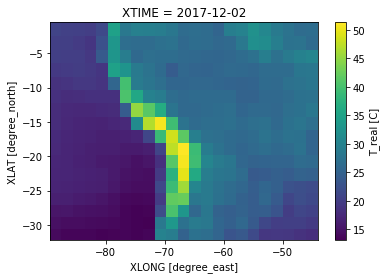

In [27]:
ds[TR][{XT:0,BT:0}].plot(x=XLO,y=XLA)

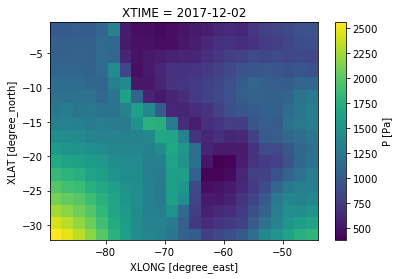

In [30]:
ds[P][{XT:0,BT:0}].plot(x=XLO,y=XLA)

Text(0.5, 1.0, 'BT:0; Mean over Time')

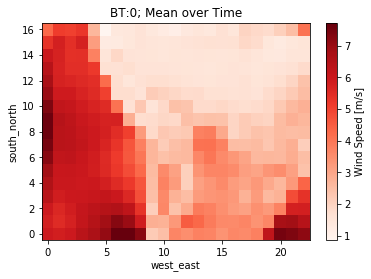

In [55]:
_ds = ds[[V,U]][{BT:0}]
_ds1 = np.sqrt(_ds[V]**2 + _ds[U]**2)
f,ax = plt.subplots()
_dm = _ds1.mean(XT)
_dm.plot.pcolormesh(cmap = plt.get_cmap('Reds'),ax=ax,cbar_kwargs={'label':'Wind Speed [m/s]'})
ax.set_title('BT:0; Mean over Time')

In [56]:
import cartopy as cy

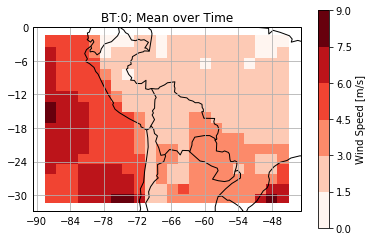

In [90]:
f,ax = plt.subplots(subplot_kw={'projection':cy.crs.PlateCarree()})
_ds = ds[[V,U]][{BT:0}]
_ds1 = np.sqrt(_ds[V]**2 + _ds[U]**2)
_dm = _ds1.mean(XT)
_dm.plot.pcolormesh(
    cmap = plt.get_cmap('Reds'),ax=ax,cbar_kwargs={'label':'Wind Speed [m/s]'},
    transform=cy.crs.PlateCarree(), x=XLO,y=XLA,
    levels = 6
)
ax.set_title('BT:0; Mean over Time')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

ax.add_feature(cy.feature.BORDERS)

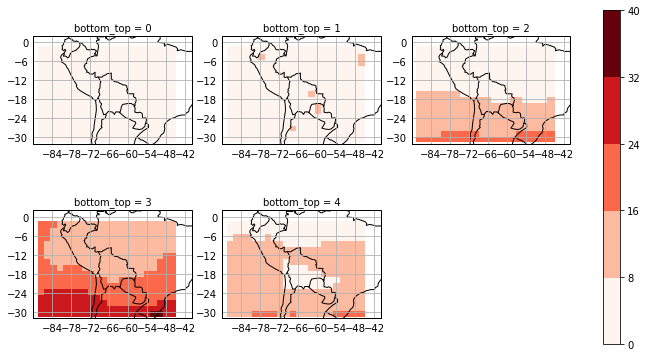

In [201]:
# f,ax = plt.subplots(subplot_kw={'projection':cy.crs.PlateCarree()})
_ds = ds[[V,U]][{BT:slice(None,None,2)}]
_ds1 = np.sqrt(_ds[V]**2 + _ds[U]**2)
_dm = _ds1.mean(XT)
p = _dm.plot.pcolormesh(
    cmap = plt.get_cmap('Reds'),cbar_kwargs={'label':'Wind Speed [m/s]'},
    transform=cy.crs.PlateCarree(), x=XLO,y=XLA,
    levels = 6,
    col=BT,
    col_wrap = 3,
    subplot_kws={'projection':cy.crs.PlateCarree(),} ,
    figsize=(10,5),
    add_colorbar = False
)
for ax in p.axes.flatten():
#     ax.set_title('BT:0; Mean over Time')
    ax.coastlines()

    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False

    ax.add_feature(cy.feature.BORDERS)
    ax.set_xlim(-90,-40)
    ax.set_ylim(-32,2)
# ax.figure.tight_layout()
# plt.subplots_adjust(wspace = .2,hspace = .2 )
p.fig.canvas.draw()
p.fig.tight_layout()
p.add_colorbar()


# p.add_colorbar()